## サポートベクターマシンを使ったワイン種類の分類
サポートベクターマシンの理論(scikit learnドキュメント) : 
https://scikit-learn.org/stable/modules/svm.html#classification

サポートベクターマシン(分類)は、**1.4.7.1. SVC**を参照

## スケーリング(標準化について)
### 「アルコール度数」と「アミノ酸の量」の2つの変数を用いた例

In [77]:
#データの読み込み
from sklearn.datasets import load_wine
import pandas as pd
wine_data = load_wine()
df_wine_features = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine_label = pd.Series(wine_data.target)
print(f"(データ数, 特徴量数) → {df_wine_features.shape}\n")
print(f"ワインの種類(ラベル)\n{df_wine_label.replace([0,1,2], wine_data.target_names).value_counts()}\n")
print("alcohol:アルコール度数, proline:アミノ酸")
df_wine_features.head()

(データ数, 特徴量数) → (178, 13)

ワインの種類(ラベル)
class_1    71
class_0    59
class_2    48
dtype: int64

alcohol:アルコール度数, proline:アミノ酸


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [90]:
#標準化(データを平均0,分散1にする処理)
from sklearn.preprocessing import StandardScaler
non_scaled_feature = df_wine_features.loc[:, ["alcohol", "proline"]][:130]
standard_scale = StandardScaler()
scaled_feature = standard_scale.fit_transform(df_wine_features.loc[:, ["alcohol", "proline"]][:130])
df_scaled_feature = pd.DataFrame(scaled_feature, columns=["alcohol", "proline"])
print("標準化前のデータ(上位5件)")
print(non_scaled_feature.head())
print("\n標準化後のデータ(上位5件)")
df_scaled_feature.head()

標準化前のデータ(上位5件)
   alcohol  proline
0    14.23   1065.0
1    13.20   1050.0
2    13.16   1185.0
3    14.37   1480.0
4    13.24    735.0

標準化後のデータ(上位5件)


,alcohol,proline
0,1.452455,0.782868
1,0.289066,0.740152
2,0.243886,1.124598
3,1.610586,1.964684
4,0.334246,-0.156889


Text(0.5, 1.0, 'scaled data')

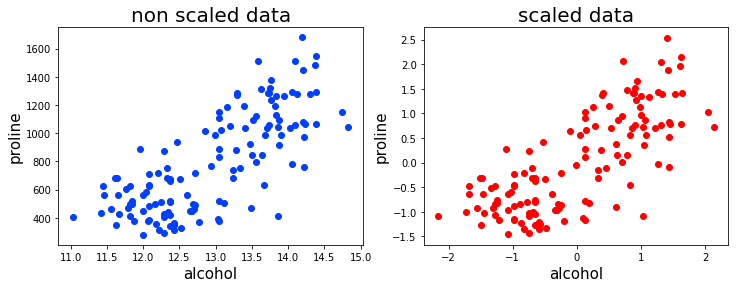

In [91]:
#図示
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-bright')
fig, (axis_left, axis_right) = plt.subplots(ncols=2, figsize=(12,4))
#scatter graph of non scaled data
axis_left.scatter(non_scaled_feature["alcohol"], non_scaled_feature["proline"])
axis_left.set_xlabel("alcohol", fontsize=15)
axis_left.set_ylabel("proline", fontsize=15)
axis_left.set_title("non scaled data", fontsize=20)
#scatter graph of scaled data
axis_right.scatter(df_scaled_feature["alcohol"], df_scaled_feature["proline"], c='red')
axis_right.set_xlabel("alcohol", fontsize=15)
axis_right.set_ylabel("proline", fontsize=15)
axis_right.set_title("scaled data", fontsize=20)

In [97]:
#2つの説明変数のみで学習
X = non_scaled_feature
X_scaled = df_scaled_feature
y = df_wine_label[:130]
from sklearn.model_selection import train_test_split
X_non_scaled_train, X_non_scaled_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=1)

In [102]:
#サポートベクターマシンを用いた学習(グリッドサーチは無し)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_non_scaled_clf = SVC(C=1, kernel="linear")
svc_scaled_clf = SVC(C=1, kernel="linear")
#traininig non scaled data
svc_non_scaled_clf.fit(X_non_scaled_train, y_train)
y_wine_non_scaled_pred = svc_non_scaled_clf.predict(X_non_scaled_test)
#training scaled data
svc_scaled_clf.fit(X_scaled_train, y_train)
y_wine_scaled_pred = svc_scaled_clf.predict(X_scaled_test)
print(f"non scaled data accuracy : {accuracy_score(y_test, y_wine_non_scaled_pred)}")
print(f"scaled data accuracy : {accuracy_score(y_test, y_wine_scaled_pred)}")

non scaled data accuracy : 0.9692307692307692
scaled data accuracy : 0.9692307692307692


訓練データの散布図


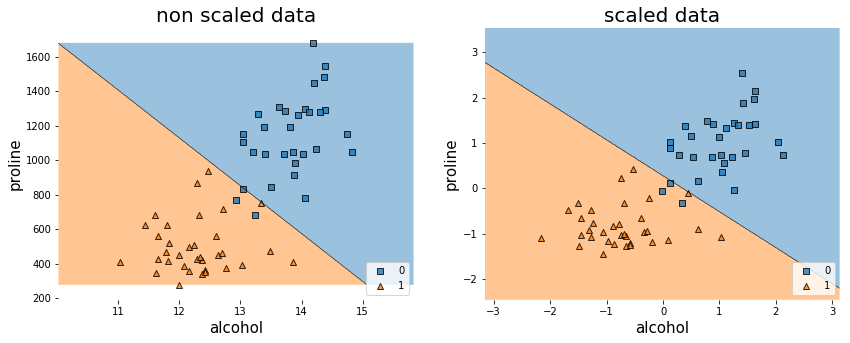

In [131]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
print("訓練データの散布図")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plot_decision_regions(np.asarray(X_non_scaled_train), np.asarray(y_train), clf=svc_non_scaled_clf, res=0.2)
plt.legend(loc="lower right")
plt.xlabel("alcohol", fontsize=15)
plt.ylabel("proline", fontsize=15)
plt.title("non scaled data", fontsize=20)
plt.subplot(1,2,2)
plot_decision_regions(np.asarray(X_scaled_train), np.asarray(y_train), clf=svc_scaled_clf, res=0.2)
plt.legend(loc="lower right")
plt.xlabel("alcohol", fontsize=15)
plt.ylabel("proline", fontsize=15)
plt.title("scaled data", fontsize=20)
plt.show()

In [140]:
print(f"全訓練データ数(スケーリングしている方も、していない方も同数) : {X_non_scaled_train.shape[0]}個")
print(f"スケーリングしていない訓練データのサポートベクトル数 [クラス0 クラス1] : {svc_non_scaled_clf.n_support_}")
print(f"スケーリングした訓練データのサポートベクトル数 [クラス0 クラス1] : {svc_scaled_clf.n_support_}")

全訓練データ数(スケーリングしている方も、していない方も同数) : 65個
スケーリングしていない訓練データのサポートベクトル数 [クラス0 クラス1] : [4 5]
スケーリングした訓練データのサポートベクトル数 [クラス0 クラス1] : [6 6]


## サポートベクターマシンのハイパーパラメータの意味
### *C, gamma, kernel*